In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [85]:
md = pd.read_csv('D:/it/cmf/hft/week1/md/md/btcusdt_Binance_LinearPerpetual/lobs.csv', nrows=30000)

In [87]:
md['receive_ts'] = pd.to_datetime(md['receive_ts'])

In [88]:
md['btcusdt:Binance:LinearPerpetual_ask_price_0'].describe()

count    30000.000000
mean     20047.762540
std         67.160038
min      19875.000000
25%      19992.900000
50%      20053.500000
75%      20092.000000
max      20199.700000
Name: btcusdt:Binance:LinearPerpetual_ask_price_0, dtype: float64

волатильность очень большая получается... 
получается, что с изменением inventory на 0.001, reservation price меняется на несколько долларов... это очень много. логично предположить, что изменение reservation price должно быть несколько центов... (10, например). поэтому разумным значением для волатильности кажется sigma [1, 10]

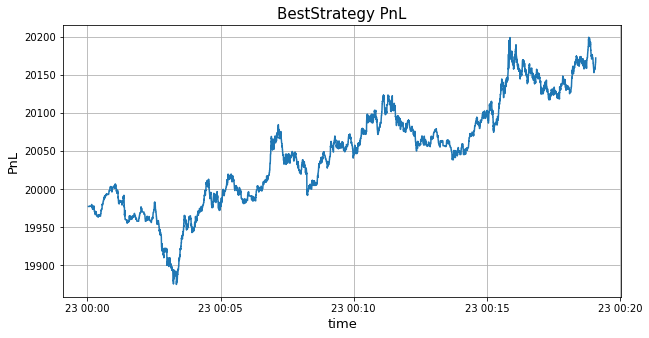

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(md['receive_ts'], md['btcusdt:Binance:LinearPerpetual_ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()

In [117]:
md.columns = [i.replace('btcusdt:Binance:LinearPerpetual_', '') for i in md.columns]

In [133]:
md['total_vol_ask'] = 0
md['total_vol_bid'] = 0
for i in range(10):
    md['total_vol_ask'] += md['ask_vol_' + str(i)]
    md['total_vol_bid'] += md['bid_vol_' + str(i)]

delta_p = c*np.log(Q)

In [144]:
c = []

In [145]:
for i in range(1, 25):
    delta_p = md['ask_price_0'][1000*i] - md['ask_price_0'][1000*i - 1000]
    delta_q = md['total_vol_bid'][1000*i] + md['total_vol_ask'][1000*i] - md['total_vol_bid'][1000*i-1000] - md['total_vol_ask'][1000*i-1000]
    current_c = abs(delta_p) / np.log(abs(delta_q)) 
    c.append(current_c)


In [146]:
c

[2.9635956551712894,
 0.3168885543346239,
 4.747219150357684,
 -3.7569839598437365,
 17.20747713885654,
 15.768292965076398,
 93.50419304952749,
 33.58550768940939,
 21.2114495309186,
 26.526036561680876,
 -55.7487602058118,
 6.554731155846666,
 13.890497618626716,
 9.058185077289112,
 4.030118730630566,
 15.633593637484942,
 25.90772787254981,
 13.665323863821113,
 5.6907025317611195,
 8.386613060285617,
 2.2536301208107123,
 3.3248076745358786,
 77.12466120155752,
 16.787884688679874]

очень как-то не подчиняется тому закону...

In [147]:
mean = 0
for x in c:
    mean+=x
mean = mean / len(c)

In [148]:
mean

14.943058056814875

наше k = alpha/c, где альфа - степень в зависимости плотности Q. альфа примерно 1.5
получаем k = 0.1

возьмем sigma = 8.0, k = 0.1

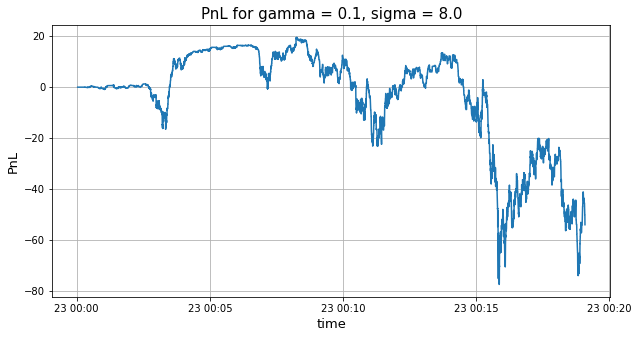

In [151]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.1, sigma = 8.0", fontsize=15)
plt.grid()
plt.show()

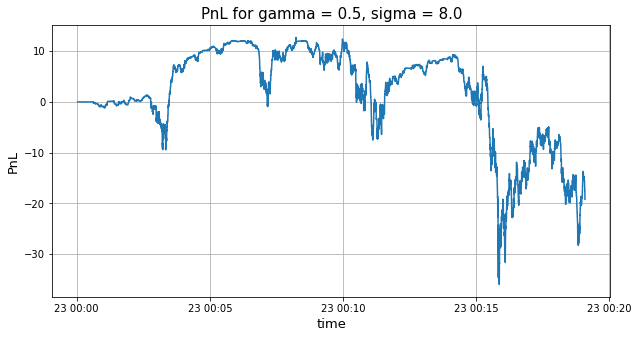

In [152]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 8.0", fontsize=15)
plt.grid()
plt.show()

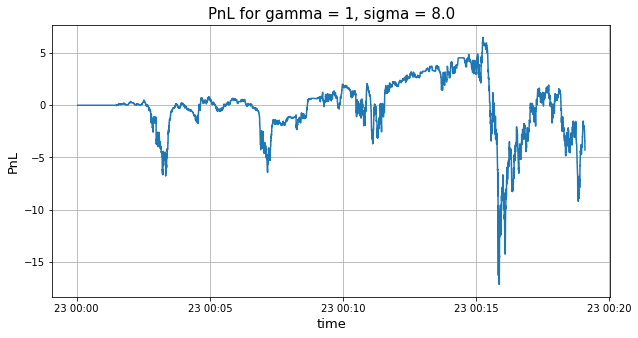

In [153]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 1, sigma = 8.0", fontsize=15)
plt.grid()
plt.show()

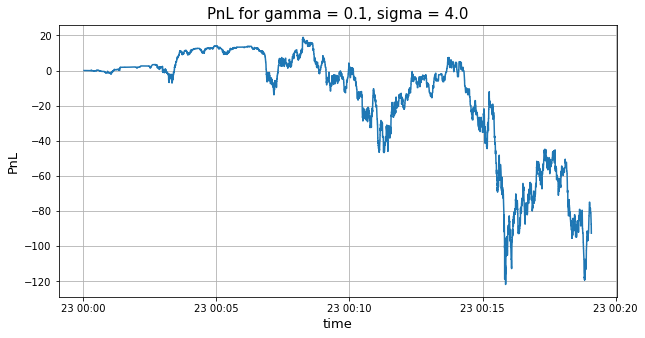

In [154]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.1, sigma = 4.0", fontsize=15)
plt.grid()
plt.show()

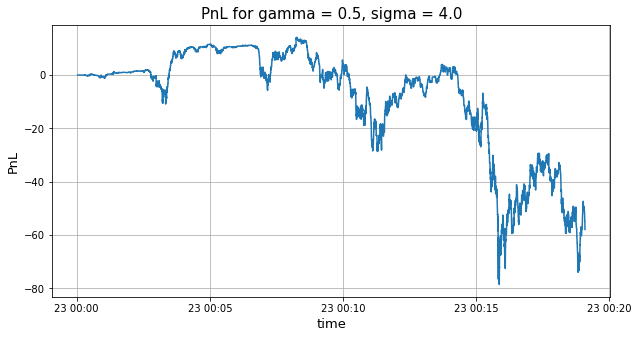

In [155]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 4.0", fontsize=15)
plt.grid()
plt.show()

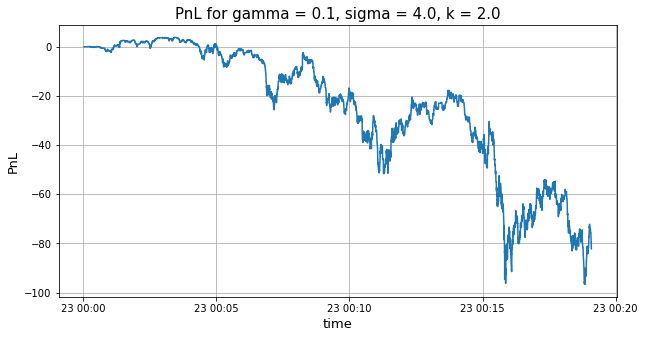

In [156]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.1, sigma = 4.0, k = 2.0", fontsize=15)
plt.grid()
plt.show()

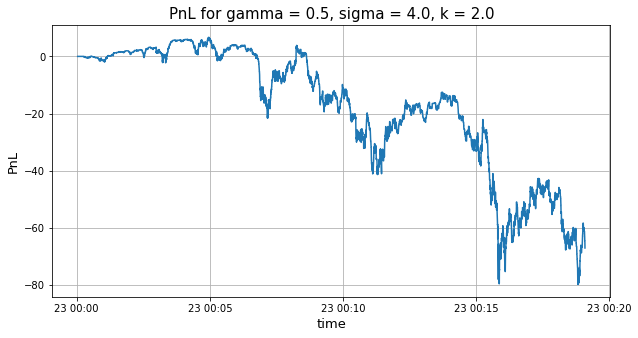

In [157]:
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 4.0, k = 2.0", fontsize=15)
plt.grid()
plt.show()